## Document Classification by K-Means

### Includes

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mpl_toolkits import mplot3d

from glove.glovevectorizer import GloveVectorizer

# Defining data

In [2]:
train = pd.read_csv('../Data/train/Reuters/r52-train-all-terms.txt', header=None, sep='\t')
test = pd.read_csv('../Data/test/Reuters/r52-test-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
test.columns = ['label', 'content']
train['lenght'] = train['content'].str.len()
lenght_mn=train['lenght'].mean()
train['lenght_mean']=(lambda x: train['lenght']/lenght_mn)(train['lenght'].values)
train['words_num'] = train['content'].str.split().str.len()
train['words_len_med'] = train['content'].str.len()/train['words_num']
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())
train['lenght_norm'] = (train['lenght'] - train['lenght'].min())/(train['lenght'].max()-train['lenght'].min())
train['words_num_norm'] = (train['words_num'] - train['words_num'].min())/(train['words_num'].max()-train['words_num'].min())
train['words_len_med_norm'] = (train['words_len_med'] - train['words_len_med'].min())/(train['words_len_med'].max()-train['words_len_med'].min())


train.head()


,label,content,lenght,lenght_mean,words_num,words_len_med,words_num_norm,words_len_med_norm,lenght_norm
0,cocoa,bahia cocoa review showers continued throughou...,2519,3.881040,456,5.524123,0.436170,0.381910,0.408971
1,earn,champion products ch approves stock split cham...,361,0.556195,62,5.822581,0.055126,0.438223,0.054387
2,acq,computer terminal systems cpml completes sale ...,1246,1.919721,210,5.933333,0.198259,0.459119,0.199803
3,earn,cobanco inc cbco year net shr cts vs dlrs net ...,221,0.340496,44,5.022727,0.037718,0.287307,0.031384
4,earn,am international inc am nd qtr jan oper shr lo...,465,0.716429,93,5.000000,0.085106,0.283019,0.071476


# Vectorizer

In [11]:
vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content)
model_1=KMeans(n_clusters=52, init='random').fit(Xtrain)
centroids = model_1.cluster_centers_

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 6532


# K Means Graph- 2 Features (Normalized)

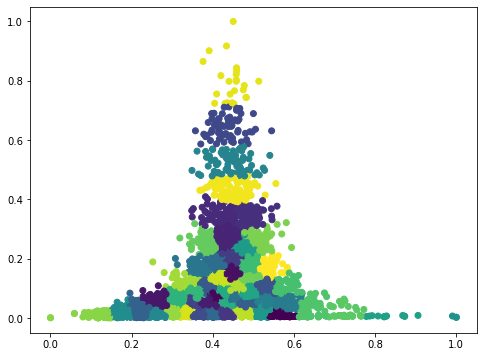

In [12]:
zipped_data = np.array(list(zip(train.words_len_med_norm, train.lenght_norm)))
model_2=KMeans(n_clusters=52, init='random').fit(zipped_data)
plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0], zipped_data[:,1], c=model_2.labels_.astype(float))
plt.show()

# K Means Graph- 2 Features (Non Normalized)

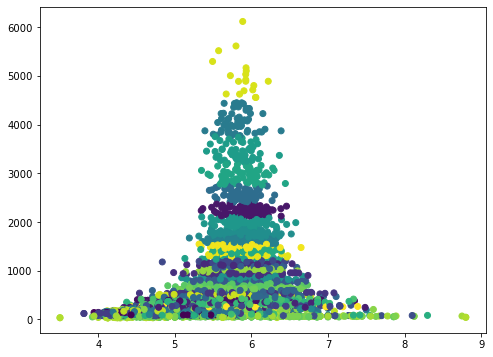

In [13]:
zipped_data = np.array(list(zip(train.words_len_med, train.lenght)))
model_3=KMeans(n_clusters=52, init='random').fit(zipped_data)
plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0], zipped_data[:,1], c=model_3.labels_.astype(float))
plt.show()

# Testing Dataset's Novel Features with K-Means

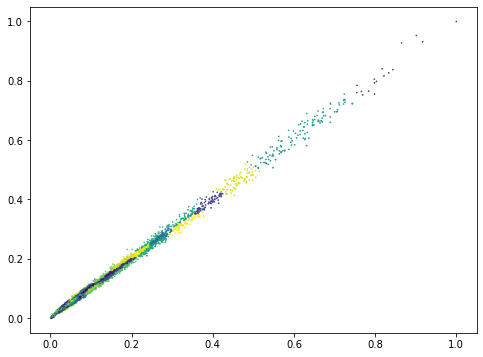

In [14]:
zipped_data = np.array(list(zip(train.lenght_norm,train.words_num_norm, train.words_len_med_norm)))

model_4_fit=KMeans(n_clusters=52, init='random').fit(zipped_data)


plt.figure(figsize=(8, 6))
plt.scatter(zipped_data[:,0],zipped_data[:,1], zipped_data[:,2], c=model_4_fit.labels_.astype(float))
plt.show()

# 3D Plotting

Text(0.5, 0.92, 'K-Means Normalized')

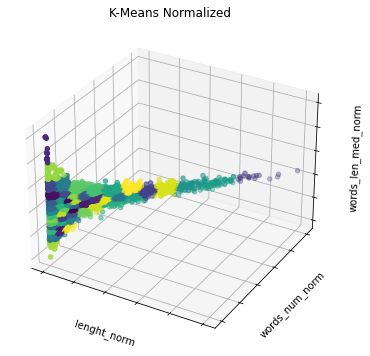

In [15]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')
ax.scatter3D(zipped_data[:,0],zipped_data[:,1], zipped_data[:,2], c=model_4_fit.labels_.astype(float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('lenght_norm')
ax.set_ylabel('words_num_norm')
ax.set_zlabel('words_len_med_norm')
ax.set_title('K-Means Normalized')

# Elbow Test

Numer of samples with no words found: 0 / 6532


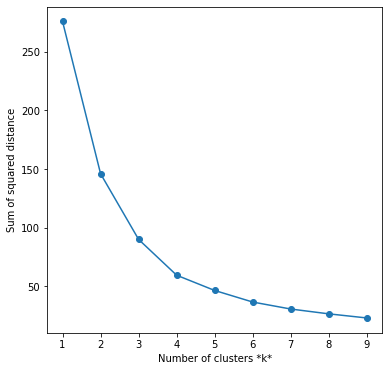

In [9]:
sse = []
list_k = list(range(1, 10))
zipped_data = np.array(list(zip(train.lenght_norm,train.words_num_norm, train.words_len_med_norm)))
Xtrain = vectorizer.fit_transform(train.content)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(zipped_data)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 6532


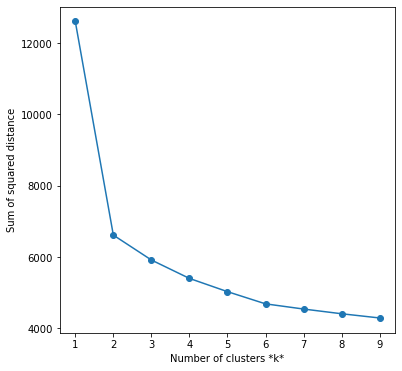

In [10]:
sse = []
list_k = list(range(1, 10))
vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content)
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(Xtrain)
    sse.append(km.inertia_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');